# 1.Reading the Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# boosting algorithms
from sklearn.ensemble import GradientBoostingClassifier

# metrics (computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
url = "https://drive.google.com/file/d/1qvkCXkhZ54m8Su7n5BKPm9-1Mz4RlHsP/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

# 2.Check the Dataset

In [3]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [4]:
# check if there are any Null values
df.isnull().sum().sort_values(ascending=False).head(11)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
dtype: int64

**CONCLUSION**: As we can see here, there are no missing values in this case

In [5]:
# check duplicated values
df.duplicated().sum()

1

In [6]:
# drop duplicated values
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.duplicated().sum()

0

# 3.Splitting Data into Training and Test Set

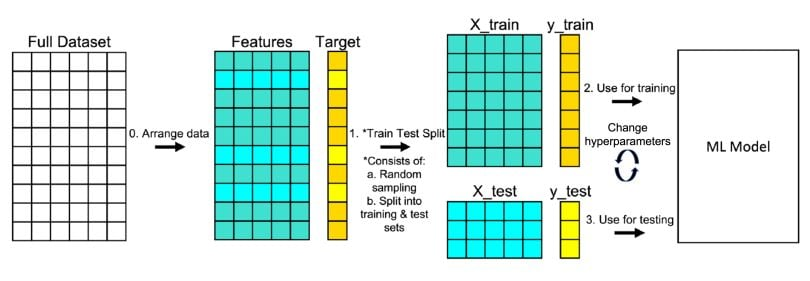

Let’s define our dependent and independent variables. 

- y: Dependent will be *Output*, because we want to predict whether athe Output is 0 or 1.

- x: Independent will be remaining variables. Given below is the code for the partition.

In [8]:
# Define X and Y
x = df.drop(labels=['output'], axis=1) # features 
y = df['output'] # target

In [9]:
# Feature Scaling / Standardizing the data
scaler = MinMaxScaler() # or StandartScaler()
x = scaler.fit_transform(x)

In [10]:
# Data splitting (Train - Test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [11]:
x = pd.DataFrame(x)
print("The shape of x_train is      ", x_train.shape)
print("The shape of x_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of x_train is       (241, 13)
The shape of x_test is        (61, 13)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


# 4.Applying Algorithms

We will be applying some models on the data set and compare Accuracy Scores.

## Logistic Regression Classifier

In [12]:
# select classifier
lg_classifier = LogisticRegression(random_state = 0)

# fit the model on the training set
lg_classifier.fit(x_train, y_train)

# predict on the test set for the model
y_predict = lg_classifier.predict(x_test)

# result of prediction model
logistic_regression_accuracy = accuracy_score(y_test, y_predict)
print("Logistic Regression Accuracy: %", round((logistic_regression_accuracy*100),3))

Logistic Regression Accuracy: % 88.525


## Random Forest Classifier

In [13]:
# select classifier
rf_classifier = RandomForestClassifier(random_state=24)

# fit the model on the training set
rf_classifier.fit(x_train, y_train)

# predict on the test set for the model
y_predict = rf_classifier.predict(x_test)

# result of prediction model
random_forest_accuracy = accuracy_score(y_test, y_predict)
print("Random Forest Accuracy: %", round((random_forest_accuracy*100),3))

Random Forest Accuracy: % 85.246


## Gradient Boosting Classifier

In [14]:
# select classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=123)

# fit the model on the training set
gb_classifier.fit(x_train, y_train)

# predict on the test set for the model
y_predict = gb_classifier.predict(x_test)

# result of prediction model
gradient_boosting_accuracy = accuracy_score(y_test, y_predict)
print("Gradient Boosting Accuracy: %", round((gradient_boosting_accuracy*100),3))

Gradient Boosting Accuracy: % 81.967


## Decision Tree Classifier

In [15]:
# select classifier
dt_classifier = DecisionTreeClassifier(random_state = 24)

# fit the model on the training set
dt_classifier.fit(x_train, y_train)

# predict on the test set for the model
y_predict = dt_classifier.predict(x_test)

# result of prediction model
decision_tree_accuracy = accuracy_score(y_test, y_predict)
print("Decision Tree Accuracy: %", round((decision_tree_accuracy*100),3))

Decision Tree Accuracy: % 78.689


# 5.Comparing Accuracy Scores

In [16]:
# create a dataframe for accuracy scores
model_comp = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','Gradient Boosting'],
                           'Accuracy Score': [decision_tree_accuracy*100, random_forest_accuracy*100, logistic_regression_accuracy*100, gradient_boosting_accuracy*100]})

# sort accuracy scores
model_df = model_comp.sort_values(by="Accuracy Score", ascending=0)
model_df

,Model,Accuracy Score
2,Logistic Regression,88.524590
1,Random Forest,85.245902
3,Gradient Boosting,81.967213
0,Decision Tree,78.688525


Text(0, 0.5, 'Model')

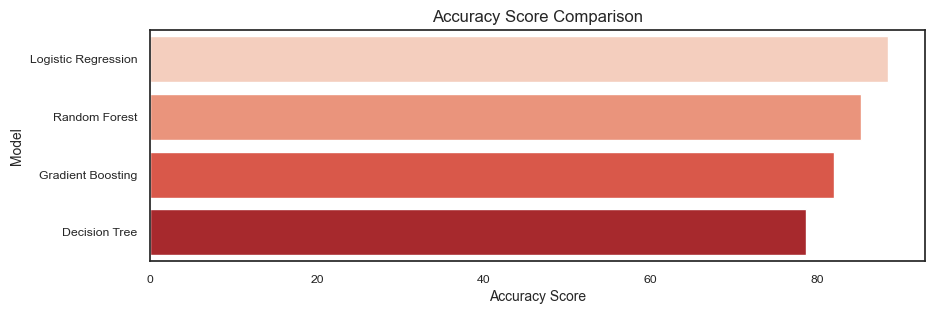

In [17]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.8)
sns.set_style("white")

sns.barplot(data=model_df,
            x="Accuracy Score",
            y="Model",
            palette="Reds");


plt.title("Accuracy Score Comparison", fontsize=12)
plt.xlabel('Accuracy Score', fontsize=10)
plt.ylabel('Model', fontsize=10)

# 6.Conclusion

**Logistic Regression Model has an accuracy score of 88.5%  and it shows that it's the best fit for this dataset.**

In [18]:
# create confusion matrix

def compute(y_pred, y_test):

    # Output plot
    cm=confusion_matrix(y_test,y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Reds',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()

    # Calculate Metrics
    acc=accuracy_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

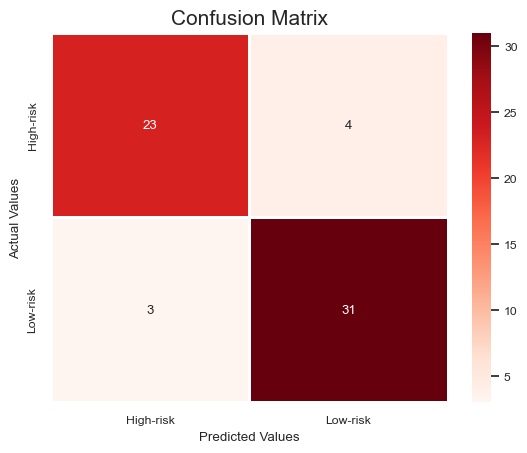

Precision: 0.886 
Recall: 0.912 
F1-Score: 0.899 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [19]:
# confusion matrix for Logistic Regression Model
compute(lg_classifier.predict(x_test), y_test)

# 7.Check the Final Model with Inputs

Lets check the Logistic Regression Model with some inputs.

In [20]:
final_classifier = lg_classifier

In [21]:
# Great

input_data = (57, 0, 1, 130, 236, 0, 0, 100, 0, 0.0, 1, 1, 2)
# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = final_classifier.predict(input_reshaped)


if (prediction[0]== 0):
    print("Great! The probability of having a heart attack is low.")
else:
    print("Warning! The probability of having a heart attack is high.")

Great! The probability of having a heart attack is low.


In [22]:
# Great

input_data = (35, 1, 0, 120, 198, 0, 1, 130, 1, 1.6, 1, 0, 3)
# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = final_classifier.predict(input_reshaped)


if (prediction[0]== 0):
    print("Great! The probability of having a heart attack is low.")
else:
    print("Warning! The probability of having a heart attack is high.")

Great! The probability of having a heart attack is low.


________________

In [27]:
# Warning

input_data = (52, 1, 2, 138, 223, 0, 1, 169, 0, 0.0, 2, 4, 2)
# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = final_classifier.predict(input_reshaped)


if (prediction[0]== 0):
    print("Great! The probability of having a heart attack is low.")
else:
    print("Warning! The probability of having a heart attack is high.")

Warning! The probability of having a heart attack is high.


In [28]:
# Warning

input_data = (56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2)
# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = final_classifier.predict(input_reshaped)


if (prediction[0]== 0):
    print("Great! The probability of having a heart attack is low.")
else:
    print("Warning! The probability of having a heart attack is high.")

Warning! The probability of having a heart attack is high.


# 8.Save the Final Model

In [22]:
import pickle 

pickle.dump(lg_classifier,open("final_model.pickle", "wb"))